#Header

Multi-Layer Perceptron and Support Vector Machines

Sarah Kim

#Import Packages

In [10]:
# Mathematics and Statistics Packages
import numpy as np
import pandas as pd

# Graphical Packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Colab Packages
from google.colab import drive
from google.colab import data_table

# Data Preparation Packages
from sklearn.model_selection import train_test_split, cross_validate

# Modeling Packages: Multi-Layer Perceptron (MLP) and Support Vector Classifier (SVC)
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# Hyperparameter Tuning Packages
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Model Evaluation Packages
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_recall_fscore_support

# Suppress Warning Messages
import warnings
warnings.filterwarnings('ignore')

##Define fuctions

In [11]:
def number_of_parameters(model_name):
  coefficients_list = model_name.coefs_
  number_of_hidden_layers = len(coefficients_list)
  parameter_count = 0
  for i in range(0,number_of_hidden_layers):
    parameter_count += model_name.coefs_[i].size + model_name.intercepts_[i].size
  return parameter_count

#Task I

##B: Load data

In [12]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [13]:
cd_df = pd.read_csv('/content/gdrive/MyDrive/Data_Sets/CD_additional_modified-v2.csv')

##C: Overall Structure

In [14]:
cd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117 entries, 0 to 4116
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      4117 non-null   int64  
 1   age             4117 non-null   int64  
 2   job             4117 non-null   object 
 3   marital         4117 non-null   object 
 4   education       4117 non-null   object 
 5   default         4117 non-null   object 
 6   housing         4117 non-null   object 
 7   loan            4117 non-null   object 
 8   contact         4117 non-null   object 
 9   month           4117 non-null   object 
 10  day_of_week     4117 non-null   object 
 11  duration        4117 non-null   int64  
 12  campaign        4117 non-null   int64  
 13  pdays           4117 non-null   int64  
 14  previous        4117 non-null   int64  
 15  poutcome        4117 non-null   object 
 16  emp_var_rate    4117 non-null   float64
 17  cons_price_idx  4117 non-null   f

In [15]:
cd_df.describe(include = 'all')

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,4117.000000,4117.000000,4117,4117,4117,4117,4117,4117,4117,4117,...,4117.000000,4117.000000,4117.000000,4117,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117
unique,NaN,NaN,12,4,7,2,3,3,2,10,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,admin.,married,university.degree,no,yes,no,cellular,may,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,NaN,1012,2508,1264,3314,2175,3347,2650,1378,...,NaN,NaN,NaN,3522,NaN,NaN,NaN,NaN,NaN,3666
mean,2058.193102,40.115375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.537042,960.403449,0.190187,NaN,0.085742,93.580131,-40.500947,3.621904,5166.496502,NaN
std,1188.913501,10.314847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.568668,191.967524,0.541765,NaN,1.562799,0.579061,4.593445,1.733448,73.670942,NaN
min,0.000000,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.635000,4963.600000,NaN
25%,1029.000000,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.334000,5099.100000,NaN
50%,2058.000000,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,3087.000000,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [16]:
cd_df.head(15)

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,1,39,services,single,high.school,no,no,no,telephone,may,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,2,25,services,married,high.school,no,yes,no,telephone,jun,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,4,47,admin.,married,university.degree,no,yes,no,cellular,nov,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
5,5,32,services,single,university.degree,no,no,no,cellular,sep,...,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no
6,6,32,admin.,single,university.degree,no,yes,no,cellular,sep,...,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no
7,7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
8,8,31,services,divorced,professional.course,no,no,no,cellular,nov,...,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no
9,9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


##D:Extract target variable

In [17]:
y_target = cd_df.pop('y')

##E: Index target variable

In [18]:
y_target = pd.get_dummies(y_target,drop_first=True)

In [19]:
y_target

,yes
0,0
1,0
2,0
3,0
4,0
...,...
4112,0
4113,0
4114,0
4115,0


##F: Handle columns

In [20]:
#drop unnecessary columns
cd_df = cd_df.drop(['Unnamed: 0'], axis = 1)

In [21]:
#numeric variables to float
n_list = list(cd_df.select_dtypes(include='int64').columns)
cd_df[n_list] = cd_df[n_list].astype('float64')

In [22]:
#object variables to category
o_list = list(cd_df.select_dtypes(include='object').columns)
cd_df[o_list] = cd_df[o_list].astype('category')

In [23]:
cd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117 entries, 0 to 4116
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             4117 non-null   float64 
 1   job             4117 non-null   category
 2   marital         4117 non-null   category
 3   education       4117 non-null   category
 4   default         4117 non-null   category
 5   housing         4117 non-null   category
 6   loan            4117 non-null   category
 7   contact         4117 non-null   category
 8   month           4117 non-null   category
 9   day_of_week     4117 non-null   category
 10  duration        4117 non-null   float64 
 11  campaign        4117 non-null   float64 
 12  pdays           4117 non-null   float64 
 13  previous        4117 non-null   float64 
 14  poutcome        4117 non-null   category
 15  emp_var_rate    4117 non-null   float64 
 16  cons_price_idx  4117 non-null   float64 
 17  cons_conf_idx 

##G: One-hot encode

In [24]:
cd_onehot_df = pd.get_dummies(cd_df, columns = list(cd_df.select_dtypes(include='category').columns))

In [25]:
cd_onehot_df.shape

(4117, 61)

##H: Train/Test split

In [26]:
random_state = 0

In [27]:
# Add dependent variable back into the dataframes
cd_df['y_target'] = y_target
cd_onehot_df['y_target'] = y_target

In [28]:
X_train, X_test, y_train, y_test = train_test_split(cd_onehot_df.drop('y_target',axis=1),
                                                    cd_onehot_df['y_target'],
                                                    train_size=0.8,
                                                    random_state=random_state)

#Task II: Multi-Layer Perceptron Architecture Tuning

##One hidden layer with 25 neurons

###Pipeline 

MODEL ARCHITECTURE
Number of Layers: 3
Number of Input Variables: 61
Weight Coefficient Matrix Shape 1: (61, 25)
Weight Coefficient Matrix Shape 2: (25, 1)
Bias Coefficient Vector Size 1: (25,)
Bias Coefficient Vector Size 2: (1,)
Total Number of Parameters: 1576
Number of Output Variables: 1
Output Classes: [0 1]
Output Activation Function: logistic


MODEL TRAINING
Number of Training Iterations: 66
Total Number of Training Samples: 217338
Current Loss: 0.22099
Minimum Loss: 0.21209




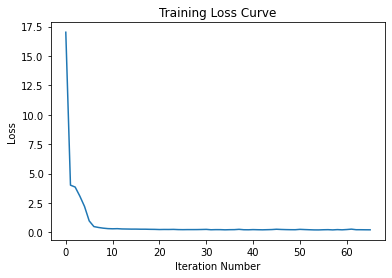

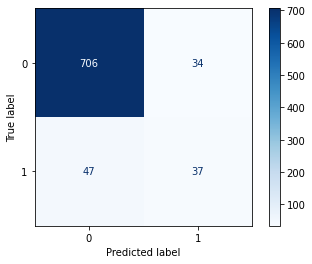

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       740
           1       0.52      0.44      0.48        84

    accuracy                           0.90       824
   macro avg       0.73      0.70      0.71       824
weighted avg       0.90      0.90      0.90       824



In [29]:
#define
model_1 = MLPClassifier(random_state=random_state,hidden_layer_sizes=(25))

#fit
model_1 = model_1.fit(X_train,y_train)

#model architecture
print("MODEL ARCHITECTURE")
print("Number of Layers: "+str(model_1.n_layers_))
print("Number of Input Variables: "+str(model_1.n_features_in_))
print("Weight Coefficient Matrix Shape 1: "+str(model_1.coefs_[0].shape))
print("Weight Coefficient Matrix Shape 2: "+str(model_1.coefs_[1].shape))
print("Bias Coefficient Vector Size 1: "+str(model_1.intercepts_[0].shape))
print("Bias Coefficient Vector Size 2: "+str(model_1.intercepts_[1].shape))
print("Total Number of Parameters: "+str(number_of_parameters(model_1)))
print("Number of Output Variables: "+str(model_1.n_outputs_))
print("Output Classes: "+str(model_1.classes_))
print("Output Activation Function: "+str(model_1.out_activation_))
print("\n")

#training process
print("MODEL TRAINING")
print("Number of Training Iterations: "+str(model_1.n_iter_))
print("Total Number of Training Samples: "+str(model_1.t_))
print("Current Loss: "+str(model_1.loss_.round(5)))
print("Minimum Loss: "+str(model_1.best_loss_.round(5)))
print("\n")

#plot the training loss curve
plt.plot(model_1.loss_curve_)
plt.xlabel('Iteration Number')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()

#makes predictions
predictions_1_test = model_1.predict(X_test)

#confusion matrix and a standard classification report
con_mat_test = confusion_matrix(y_test,predictions_1_test,labels=[0,1])
ax = ConfusionMatrixDisplay(confusion_matrix=con_mat_test,display_labels=[0,1])
ax.plot(values_format='',cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test,predictions_1_test))

###Cross-validation

In [30]:
#combine train and test data
X_full = pd.concat([X_test, X_train])
X_full.shape

(4117, 61)

In [31]:
y_full = pd.concat([y_test, y_train])
y_full.shape

(4117,)

In [32]:
#5-fold cross-validation 
model_1_cv = MLPClassifier(random_state=random_state,hidden_layer_sizes=(25))
model_1_cv_results = pd.DataFrame(cross_validate(model_1_cv,X_full,y_full,cv=5,return_train_score=True,scoring=['accuracy','precision','recall','f1']))
model_1_cv_results = model_1_cv_results.drop(columns='score_time')
model_1_cv_results.loc['mean'] = model_1_cv_results.mean()
model_1_cv_results

,fit_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,4.527049,0.900485,0.918615,0.550000,0.665480,0.488889,0.518006,0.517647,0.582555
1,4.351876,0.904126,0.913149,0.666667,0.760563,0.263736,0.300000,0.377953,0.430279
2,1.404704,0.906440,0.915604,0.638298,0.702439,0.333333,0.398892,0.437956,0.508834
3,1.057753,0.914945,0.907407,0.777778,0.712121,0.311111,0.260388,0.444444,0.381339
4,1.350412,0.917375,0.911050,0.789474,0.704819,0.333333,0.324100,0.468750,0.444023
mean,2.538359,0.908674,0.913165,0.684443,0.709085,0.346081,0.360277,0.449350,0.469406


##Two hidden layers with 25 neurons each

###Pipeline

MODEL ARCHITECTURE
Number of Layers: 4
Number of Input Variables: 61
Weight Coefficient Matrix Shape 1: (61, 25)
Weight Coefficient Matrix Shape 2: (25, 25)
Bias Coefficient Vector Size 1: (25,)
Bias Coefficient Vector Size 2: (25,)
Total Number of Parameters: 2226
Number of Output Variables: 1
Output Classes: [0 1]
Output Activation Function: logistic


MODEL TRAINING
Number of Training Iterations: 30
Total Number of Training Samples: 98790
Current Loss: 0.29265
Minimum Loss: 0.25015




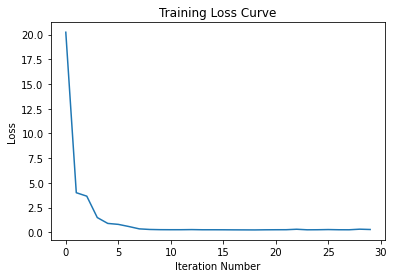

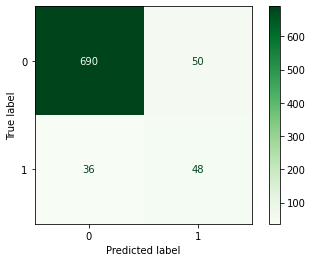

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       740
           1       0.49      0.57      0.53        84

    accuracy                           0.90       824
   macro avg       0.72      0.75      0.73       824
weighted avg       0.90      0.90      0.90       824



In [33]:
#define
model_2 = MLPClassifier(random_state=random_state,hidden_layer_sizes=(25,25))

#fit
model_2 = model_2.fit(X_train,y_train)

#model architecture
print("MODEL ARCHITECTURE")
print("Number of Layers: "+str(model_2.n_layers_))
print("Number of Input Variables: "+str(model_2.n_features_in_))
print("Weight Coefficient Matrix Shape 1: "+str(model_2.coefs_[0].shape))
print("Weight Coefficient Matrix Shape 2: "+str(model_2.coefs_[1].shape))
print("Bias Coefficient Vector Size 1: "+str(model_2.intercepts_[0].shape))
print("Bias Coefficient Vector Size 2: "+str(model_2.intercepts_[1].shape))
print("Total Number of Parameters: "+str(number_of_parameters(model_2)))
print("Number of Output Variables: "+str(model_2.n_outputs_))
print("Output Classes: "+str(model_2.classes_))
print("Output Activation Function: "+str(model_2.out_activation_))
print("\n")

#training process
print("MODEL TRAINING")
print("Number of Training Iterations: "+str(model_2.n_iter_))
print("Total Number of Training Samples: "+str(model_2.t_))
print("Current Loss: "+str(model_2.loss_.round(5)))
print("Minimum Loss: "+str(model_2.best_loss_.round(5)))
print("\n")

#plot the training loss curve
plt.plot(model_2.loss_curve_)
plt.xlabel('Iteration Number')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()

#makes predictions
predictions_2_test = model_2.predict(X_test)

#confusion matrix and a standard classification report
con_mat_test = confusion_matrix(y_test,predictions_2_test,labels=[0,1])
ax = ConfusionMatrixDisplay(confusion_matrix=con_mat_test,display_labels=[0,1])
ax.plot(values_format='',cmap=plt.cm.Greens)
plt.show()
print(classification_report(y_test,predictions_2_test))

###Cross Validation

In [34]:
#5-fold cross-validation 
model_2_cv = MLPClassifier(random_state=random_state,hidden_layer_sizes=(25,25))
model_2_cv_results = pd.DataFrame(cross_validate(model_2_cv,X_full,y_full,cv=5,return_train_score=True,scoring=['accuracy','precision','recall','f1']))
model_2_cv_results = model_2_cv_results.drop(columns='score_time')
model_2_cv_results.loc['mean'] = model_2_cv_results.mean()
model_2_cv_results

,fit_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,2.005604,0.877427,0.903432,0.460993,0.545842,0.722222,0.709141,0.562771,0.616867
1,0.934106,0.861650,0.873975,0.421769,0.451327,0.681319,0.708333,0.521008,0.551351
2,2.819484,0.897934,0.910140,0.575000,0.660099,0.255556,0.371191,0.353846,0.475177
3,2.117262,0.906440,0.901639,0.782609,0.753425,0.200000,0.152355,0.318584,0.253456
4,1.668738,0.919806,0.909229,0.740000,0.631356,0.411111,0.412742,0.528571,0.499162
mean,1.909039,0.892651,0.899683,0.596074,0.608410,0.454042,0.470753,0.456956,0.479203


##Four hidden layers with 25 neurons each

###Pipeline

MODEL ARCHITECTURE
Number of Layers: 6
Number of Input Variables: 61
Weight Coefficient Matrix Shape 1: (61, 25)
Weight Coefficient Matrix Shape 2: (25, 25)
Bias Coefficient Vector Size 1: (25,)
Bias Coefficient Vector Size 2: (25,)
Total Number of Parameters: 3526
Number of Output Variables: 1
Output Classes: [0 1]
Output Activation Function: logistic


MODEL TRAINING
Number of Training Iterations: 29
Total Number of Training Samples: 95497
Current Loss: 0.28005
Minimum Loss: 0.245




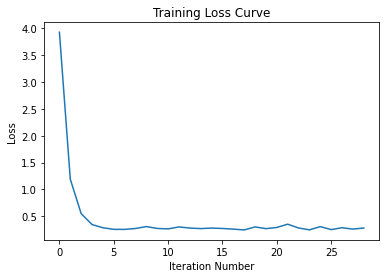

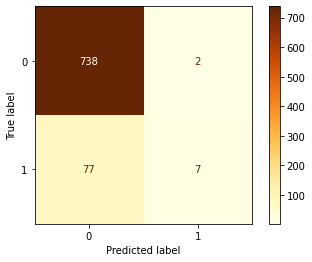

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       740
           1       0.78      0.08      0.15        84

    accuracy                           0.90       824
   macro avg       0.84      0.54      0.55       824
weighted avg       0.89      0.90      0.87       824



In [35]:
#define
model_3 = MLPClassifier(random_state=random_state,hidden_layer_sizes=(25,25,25,25))

#fit
model_3 = model_3.fit(X_train,y_train)

#model architecture
print("MODEL ARCHITECTURE")
print("Number of Layers: "+str(model_3.n_layers_))
print("Number of Input Variables: "+str(model_3.n_features_in_))
print("Weight Coefficient Matrix Shape 1: "+str(model_3.coefs_[0].shape))
print("Weight Coefficient Matrix Shape 2: "+str(model_3.coefs_[1].shape))
print("Bias Coefficient Vector Size 1: "+str(model_3.intercepts_[0].shape))
print("Bias Coefficient Vector Size 2: "+str(model_3.intercepts_[1].shape))
print("Total Number of Parameters: "+str(number_of_parameters(model_3)))
print("Number of Output Variables: "+str(model_3.n_outputs_))
print("Output Classes: "+str(model_3.classes_))
print("Output Activation Function: "+str(model_3.out_activation_))
print("\n")

#training process
print("MODEL TRAINING")
print("Number of Training Iterations: "+str(model_3.n_iter_))
print("Total Number of Training Samples: "+str(model_3.t_))
print("Current Loss: "+str(model_3.loss_.round(5)))
print("Minimum Loss: "+str(model_3.best_loss_.round(5)))
print("\n")

#plot the training loss curve
plt.plot(model_3.loss_curve_)
plt.xlabel('Iteration Number')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()

#makes predictions
predictions_3_test = model_3.predict(X_test)

#confusion matrix and a standard classification report
con_mat_test = confusion_matrix(y_test,predictions_3_test,labels=[0,1])
ax = ConfusionMatrixDisplay(confusion_matrix=con_mat_test,display_labels=[0,1])
ax.plot(values_format='',cmap=plt.cm.YlOrBr)
plt.show()
print(classification_report(y_test,predictions_3_test))

###Cross Validation

In [36]:
#5-fold cross-validation 
model_3_cv = MLPClassifier(random_state=random_state,hidden_layer_sizes=(25,25,25,25))
model_3_cv_results = pd.DataFrame(cross_validate(model_3_cv,X_full,y_full,cv=5,return_train_score=True,scoring=['accuracy','precision','recall','f1']))
model_3_cv_results = model_3_cv_results.drop(columns='score_time')
model_3_cv_results.loc['mean'] = model_3_cv_results.mean()
model_3_cv_results

,fit_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,1.865604,0.902913,0.904646,0.708333,0.770115,0.188889,0.185596,0.298246,0.299107
1,1.465828,0.884709,0.898876,0.481818,0.531034,0.582418,0.641667,0.527363,0.581132
2,2.017264,0.895504,0.903764,0.642857,0.797297,0.100000,0.163435,0.173077,0.271264
3,1.208757,0.912515,0.901943,0.781250,0.706522,0.277778,0.180055,0.409836,0.286976
4,1.724405,0.899149,0.874924,0.528000,0.453382,0.733333,0.686981,0.613953,0.546256
mean,1.656372,0.898958,0.896831,0.628452,0.651670,0.376484,0.371547,0.404495,0.396947


##One hidden layer with 125 neurons

###Pipeline

MODEL ARCHITECTURE
Number of Layers: 3
Number of Input Variables: 61
Weight Coefficient Matrix Shape 1: (61, 125)
Weight Coefficient Matrix Shape 2: (125, 1)
Bias Coefficient Vector Size 1: (125,)
Bias Coefficient Vector Size 2: (1,)
Total Number of Parameters: 7876
Number of Output Variables: 1
Output Classes: [0 1]
Output Activation Function: logistic


MODEL TRAINING
Number of Training Iterations: 26
Total Number of Training Samples: 85618
Current Loss: 0.34059
Minimum Loss: 0.29441




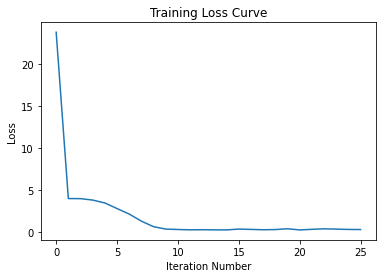

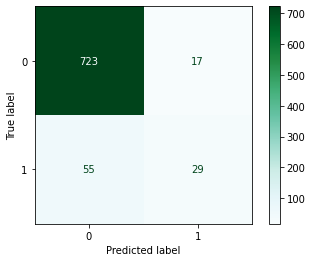

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       740
           1       0.63      0.35      0.45        84

    accuracy                           0.91       824
   macro avg       0.78      0.66      0.70       824
weighted avg       0.90      0.91      0.90       824



In [37]:
#define
model_4 = MLPClassifier(random_state=random_state,hidden_layer_sizes=(125))

#fit
model_4 = model_4.fit(X_train,y_train)

#model architecture
print("MODEL ARCHITECTURE")
print("Number of Layers: "+str(model_4.n_layers_))
print("Number of Input Variables: "+str(model_4.n_features_in_))
print("Weight Coefficient Matrix Shape 1: "+str(model_4.coefs_[0].shape))
print("Weight Coefficient Matrix Shape 2: "+str(model_4.coefs_[1].shape))
print("Bias Coefficient Vector Size 1: "+str(model_4.intercepts_[0].shape))
print("Bias Coefficient Vector Size 2: "+str(model_4.intercepts_[1].shape))
print("Total Number of Parameters: "+str(number_of_parameters(model_4)))
print("Number of Output Variables: "+str(model_4.n_outputs_))
print("Output Classes: "+str(model_4.classes_))
print("Output Activation Function: "+str(model_4.out_activation_))
print("\n")

#training process
print("MODEL TRAINING")
print("Number of Training Iterations: "+str(model_4.n_iter_))
print("Total Number of Training Samples: "+str(model_4.t_))
print("Current Loss: "+str(model_4.loss_.round(5)))
print("Minimum Loss: "+str(model_4.best_loss_.round(5)))
print("\n")

#plot the training loss curve
plt.plot(model_4.loss_curve_)
plt.xlabel('Iteration Number')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()

#makes predictions
predictions_4_test = model_4.predict(X_test)

#confusion matrix and a standard classification report
con_mat_test = confusion_matrix(y_test,predictions_4_test,labels=[0,1])
ax = ConfusionMatrixDisplay(confusion_matrix=con_mat_test,display_labels=[0,1])
ax.plot(values_format='',cmap=plt.cm.BuGn)
plt.show()
print(classification_report(y_test,predictions_4_test))

###Cross Validation

In [38]:
#5-fold cross-validation 
model_4_cv = MLPClassifier(random_state=random_state,hidden_layer_sizes=(125))
model_4_cv_results = pd.DataFrame(cross_validate(model_4_cv,X_full,y_full,cv=5,return_train_score=True,scoring=['accuracy','precision','recall','f1']))
model_4_cv_results = model_4_cv_results.drop(columns='score_time')
model_4_cv_results.loc['mean'] = model_4_cv_results.mean()
model_4_cv_results

,fit_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,1.743404,0.690534,0.699970,0.258065,0.261959,0.977778,0.955679,0.408353,0.411204
1,1.388566,0.614078,0.604009,0.218362,0.216005,0.967033,0.997222,0.356275,0.355094
2,1.891819,0.897934,0.905282,0.687500,0.788235,0.122222,0.185596,0.207547,0.300448
3,1.432315,0.916160,0.906497,0.643836,0.595668,0.522222,0.457064,0.576687,0.517241
4,1.344355,0.921021,0.904068,0.654321,0.561308,0.588889,0.570637,0.619883,0.565934
mean,1.560092,0.807945,0.803965,0.492417,0.484635,0.635629,0.633239,0.433749,0.429984


##One hidden layer with 5 neurons

###Pipeline

MODEL ARCHITECTURE
Number of Layers: 3
Number of Input Variables: 61
Weight Coefficient Matrix Shape 1: (61, 5)
Weight Coefficient Matrix Shape 2: (5, 1)
Bias Coefficient Vector Size 1: (5,)
Bias Coefficient Vector Size 2: (1,)
Total Number of Parameters: 316
Number of Output Variables: 1
Output Classes: [0 1]
Output Activation Function: logistic


MODEL TRAINING
Number of Training Iterations: 200
Total Number of Training Samples: 658600
Current Loss: 0.31328
Minimum Loss: 0.31328




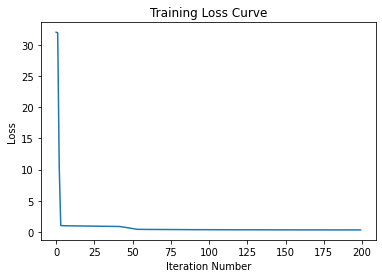

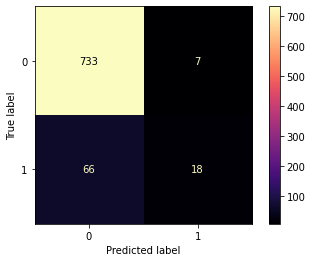

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       740
           1       0.72      0.21      0.33        84

    accuracy                           0.91       824
   macro avg       0.82      0.60      0.64       824
weighted avg       0.90      0.91      0.89       824



In [39]:
#define
model_5 = MLPClassifier(random_state=random_state,hidden_layer_sizes=(5))

#fit
model_5 = model_5.fit(X_train,y_train)

#model architecture
print("MODEL ARCHITECTURE")
print("Number of Layers: "+str(model_5.n_layers_))
print("Number of Input Variables: "+str(model_5.n_features_in_))
print("Weight Coefficient Matrix Shape 1: "+str(model_5.coefs_[0].shape))
print("Weight Coefficient Matrix Shape 2: "+str(model_5.coefs_[1].shape))
print("Bias Coefficient Vector Size 1: "+str(model_5.intercepts_[0].shape))
print("Bias Coefficient Vector Size 2: "+str(model_5.intercepts_[1].shape))
print("Total Number of Parameters: "+str(number_of_parameters(model_5)))
print("Number of Output Variables: "+str(model_5.n_outputs_))
print("Output Classes: "+str(model_5.classes_))
print("Output Activation Function: "+str(model_5.out_activation_))
print("\n")

#training process
print("MODEL TRAINING")
print("Number of Training Iterations: "+str(model_5.n_iter_))
print("Total Number of Training Samples: "+str(model_5.t_))
print("Current Loss: "+str(model_5.loss_.round(5)))
print("Minimum Loss: "+str(model_5.best_loss_.round(5)))
print("\n")

#plot the training loss curve
plt.plot(model_5.loss_curve_)
plt.xlabel('Iteration Number')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()

#makes predictions
predictions_5_test = model_5.predict(X_test)

#confusion matrix and a standard classification report
con_mat_test = confusion_matrix(y_test,predictions_5_test,labels=[0,1])
ax = ConfusionMatrixDisplay(confusion_matrix=con_mat_test,display_labels=[0,1])
ax.plot(values_format='',cmap=plt.cm.magma)
plt.show()
print(classification_report(y_test,predictions_5_test))

###Cross Validation

In [40]:
#5-fold cross-validation 
model_5_cv = MLPClassifier(random_state=random_state,hidden_layer_sizes=(5))
model_5_cv_results = pd.DataFrame(cross_validate(model_5_cv,X_full,y_full,cv=5,return_train_score=True,scoring=['accuracy','precision','recall','f1']))
model_5_cv_results = model_5_cv_results.drop(columns='score_time')
model_5_cv_results.loc['mean'] = model_5_cv_results.mean()
model_5_cv_results

,fit_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,2.288807,0.905340,0.907076,0.730769,0.808989,0.211111,0.199446,0.327586,0.320000
1,1.941765,0.899272,0.905861,0.785714,0.812500,0.120879,0.180556,0.209524,0.295455
2,1.824350,0.904010,0.907407,0.761905,0.797872,0.177778,0.207756,0.288288,0.329670
3,2.079512,0.914945,0.904372,0.833333,0.794872,0.277778,0.171745,0.416667,0.282460
4,1.892770,0.902795,0.906800,0.708333,0.770000,0.188889,0.213296,0.298246,0.334056
mean,2.005441,0.905272,0.906303,0.764011,0.796847,0.195287,0.194560,0.308062,0.312328


#Task III: Multi-Layer Perceptron Hyperparameter Tuning

##Learning_rate_init   

In [41]:
# model one
model_6_cv = MLPClassifier(random_state=random_state,hidden_layer_sizes=(25,25),learning_rate_init=0.01)
model_6_cv_results = pd.DataFrame(cross_validate(model_6_cv,X_full,y_full,cv=5,return_train_score=True,scoring=['accuracy','precision','recall','f1']))
model_6_cv_results = model_6_cv_results.drop(columns='score_time')
model_6_cv_results.loc['mean'] = model_6_cv_results.mean()
model_6_cv_results

,fit_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,1.081427,0.901699,0.909809,0.581818,0.686047,0.355556,0.326870,0.441379,0.442777
1,1.425421,0.865291,0.874279,0.439759,0.457547,0.802198,0.808333,0.568093,0.584337
2,1.277337,0.895504,0.917426,0.522727,0.636086,0.511111,0.576177,0.516854,0.604651
3,1.344269,0.911300,0.909532,0.639344,0.631799,0.433333,0.418283,0.516556,0.503333
4,1.173932,0.895504,0.897086,0.833333,0.775000,0.055556,0.085873,0.104167,0.154613
mean,1.260477,0.893860,0.901626,0.603396,0.637296,0.431551,0.443107,0.429410,0.457942


In [42]:
# model two
model_7_cv = MLPClassifier(random_state=random_state,hidden_layer_sizes=(25,25),learning_rate_init=0.0001)
model_7_cv_results = pd.DataFrame(cross_validate(model_7_cv,X_full,y_full,cv=5,return_train_score=True,scoring=['accuracy','precision','recall','f1']))
model_7_cv_results = model_7_cv_results.drop(columns='score_time')
model_7_cv_results.loc['mean'] = model_7_cv_results.mean()
model_7_cv_results


,fit_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,4.928644,0.889563,0.914971,0.493827,0.650558,0.444444,0.484765,0.467836,0.555556
1,4.995764,0.904126,0.913149,0.607143,0.645669,0.373626,0.455556,0.462585,0.534202
2,5.143507,0.899149,0.911354,0.552239,0.616949,0.411111,0.504155,0.471338,0.554878
3,5.203889,0.917375,0.908318,0.671875,0.612167,0.477778,0.445983,0.558442,0.516026
4,4.659413,0.922236,0.906800,0.716667,0.613445,0.477778,0.404432,0.573333,0.487479
mean,4.986244,0.906490,0.910919,0.608350,0.627758,0.436947,0.458978,0.506707,0.529628


When the learning parameter equals 0.0001, it would improve the model

When the learning parameter equals 0.01, it would deteriorate the model

##Activation   

In [43]:
# model one
model_8_cv = MLPClassifier(random_state=random_state, hidden_layer_sizes=(25,25),activation='logistic')
model_8_cv_results = pd.DataFrame(cross_validate(model_8_cv,X_full,y_full,cv=5,return_train_score=True,scoring=['accuracy','precision','recall','f1']))
model_8_cv_results = model_8_cv_results.drop(columns='score_time')
model_8_cv_results.loc['mean'] = model_8_cv_results.mean()
model_8_cv_results

,fit_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,2.221810,0.890777,0.911631,0.500000,0.629630,0.466667,0.470914,0.482759,0.538827
1,2.906747,0.904126,0.913453,0.666667,0.732919,0.263736,0.327778,0.377953,0.452975
2,3.166088,0.905225,0.907407,0.593750,0.597902,0.422222,0.473684,0.493506,0.528594
3,3.176118,0.912515,0.907711,0.645161,0.613546,0.444444,0.426593,0.526316,0.503268
4,3.659448,0.921021,0.905889,0.727273,0.615385,0.444444,0.376731,0.551724,0.467354
mean,3.026042,0.906733,0.909218,0.626570,0.637876,0.408303,0.415140,0.486452,0.498204


In [44]:
# model two
model_9_cv = MLPClassifier(random_state=random_state, hidden_layer_sizes=(25,25),activation='tanh')
model_9_cv_results = pd.DataFrame(cross_validate(model_9_cv,X_full,y_full,cv=5,return_train_score=True,scoring=['accuracy','precision','recall','f1']))
model_9_cv_results = model_9_cv_results.drop(columns='score_time')
model_9_cv_results.loc['mean'] = model_9_cv_results.mean()
model_9_cv_results

,fit_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,1.276027,0.902913,0.902824,0.812500,0.815385,0.144444,0.146814,0.245283,0.248826
1,0.875580,0.894417,0.906165,0.642857,0.793103,0.098901,0.191667,0.171429,0.308725
2,1.812103,0.891859,0.891621,1.000000,0.700000,0.011111,0.019391,0.021978,0.037736
3,1.128330,0.914945,0.903764,0.685185,0.617021,0.411111,0.321330,0.513889,0.422587
4,0.824305,0.908870,0.904068,0.611940,0.578397,0.455556,0.459834,0.522293,0.512346
mean,1.183269,0.902601,0.901688,0.750497,0.700781,0.224225,0.227807,0.294974,0.306044


When using logistic sigmoid function, it would improve the model

When using hyperbolic tan function, it would deteriorate the model

##Alpha   

In [45]:
# model one
model_10_cv = MLPClassifier(random_state=random_state, hidden_layer_sizes=(25,25),alpha=0.001)
model_10_cv_results = pd.DataFrame(cross_validate(model_10_cv,X_full,y_full,cv=5,return_train_score=True,scoring=['accuracy','precision','recall','f1']))
model_10_cv_results = model_10_cv_results.drop(columns='score_time')
model_10_cv_results.loc['mean'] = model_10_cv_results.mean()
model_10_cv_results

,fit_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,2.451218,0.885922,0.910720,0.483333,0.582310,0.644444,0.656510,0.552381,0.617188
1,1.361597,0.893204,0.901913,0.636364,0.717647,0.076923,0.169444,0.137255,0.274157
2,1.093929,0.900365,0.910140,0.560606,0.618182,0.411111,0.470914,0.474359,0.534591
3,1.271939,0.910085,0.902247,0.588889,0.554017,0.588889,0.554017,0.588889,0.554017
4,1.769906,0.910085,0.886460,0.574074,0.487078,0.688889,0.678670,0.626263,0.567130
mean,1.589718,0.899932,0.902296,0.568653,0.591847,0.482051,0.505911,0.475829,0.509416


In [46]:
# model two
model_11_cv = MLPClassifier(random_state=random_state, hidden_layer_sizes=(25,25),alpha=0.0)
model_11_cv_results = pd.DataFrame(cross_validate(model_11_cv,X_full,y_full,cv=5,return_train_score=True,scoring=['accuracy','precision','recall','f1']))
model_11_cv_results = model_11_cv_results.drop(columns='score_time')
model_11_cv_results.loc['mean'] = model_11_cv_results.mean()
model_11_cv_results

,fit_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,1.495160,0.900485,0.896751,0.833333,0.783784,0.111111,0.080332,0.196078,0.145729
1,0.830741,0.858010,0.873368,0.413333,0.450088,0.681319,0.713889,0.514523,0.552095
2,1.229439,0.893074,0.893443,0.750000,0.916667,0.033333,0.030471,0.063830,0.058981
3,1.360684,0.914945,0.904979,0.613636,0.564865,0.600000,0.578947,0.606742,0.571819
4,1.618468,0.918591,0.907407,0.666667,0.588608,0.511111,0.515235,0.578616,0.549483
mean,1.306898,0.897021,0.895189,0.655394,0.660802,0.387375,0.383775,0.391958,0.375621


When alpha equals 0.001, it would improve the model 

When alpha equals 0.01, it would deteriorate the model

#Task IV: Automated MLP Architecture and Hyperparameter Tuning

##A: Using the GridSearchCV() function

In [ ]:
parameters = {'hidden_layer_sizes':[(25),(25,25),(25,25,25,25),(125),(5)],
              'activation':['logistic','tanh','relu'],
              'learning_rate_init':[0.001,0.0005,0.0001],
              'alpha':[0.0,0.001,0.0001]
              }
mlp = MLPClassifier(random_state=random_state)
mlp_tuning_grid = GridSearchCV(mlp,parameters,scoring='f1',verbose=3)
mlp_tuning_grid.fit(X_full,y_full)

Fitting 5 folds for each of 135 candidates, totalling 675 fits
[CV 1/5] END activation=logistic, alpha=0.0, hidden_layer_sizes=25, learning_rate_init=0.001;, score=0.000 total time=   2.0s
[CV 2/5] END activation=logistic, alpha=0.0, hidden_layer_sizes=25, learning_rate_init=0.001;, score=0.491 total time=   4.1s
[CV 3/5] END activation=logistic, alpha=0.0, hidden_layer_sizes=25, learning_rate_init=0.001;, score=0.484 total time=   4.4s
[CV 4/5] END activation=logistic, alpha=0.0, hidden_layer_sizes=25, learning_rate_init=0.001;, score=0.000 total time=   3.8s
[CV 5/5] END activation=logistic, alpha=0.0, hidden_layer_sizes=25, learning_rate_init=0.001;, score=0.000 total time=   3.0s
[CV 1/5] END activation=logistic, alpha=0.0, hidden_layer_sizes=25, learning_rate_init=0.0005;, score=0.000 total time=   4.7s
[CV 2/5] END activation=logistic, alpha=0.0, hidden_layer_sizes=25, learning_rate_init=0.0005;, score=0.000 total time=   4.4s
[CV 3/5] END activation=logistic, alpha=0.0, hidden_l

##B: 

In [ ]:
#the total combinations would be 5*3*3*3 = 135
print(5*3*3*3)

##C:

In [ ]:
#when also counting the cross-validation fold, the total models would be 135*5 = 675, because it was 5-fold cv
print(135*5)

##D: Show results

In [ ]:
mlp_tuning_grid_df = pd.DataFrame(mlp_tuning_grid.cv_results_)
mlp_tuning_grid_df = mlp_tuning_grid_df.drop(columns=['mean_score_time','std_score_time','mean_fit_time','std_fit_time'])
print("Hyperparameter Search Grid Size: "+str(mlp_tuning_grid_df.shape))

##E:  Best models

In [ ]:
#sort out 5 best models 
mlp_tuning_grid_df.sort_values('mean_test_score',ascending=False).head(5)

In [ ]:
#Find the best model
best_mlp_model = mlp_tuning_grid.best_estimator_
best_mlp_model

##F: Evaluate the best model

In [ ]:
#makes predictions
predictions_best_mlp_model = best_mlp_model.predict(X_test)

#confusion matrix and a standard classification report
con_mat_test = confusion_matrix(y_test,predictions_best_mlp_model,labels=[0,1])
ax = ConfusionMatrixDisplay(confusion_matrix=con_mat_test,display_labels=[0,1])
ax.plot(values_format='',cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test,predictions_best_mlp_model))

##G: Plots

In [ ]:
# Mean F1-Score (testing) vs. Learning Rate with the Activation Function as a Colored Legend
colors = {'logistic':'red','tanh':'blue','relu':'green'}
sns.lmplot('param_learning_rate_init','mean_test_score',data=mlp_tuning_grid_df,palette=colors,hue='param_activation',fit_reg=False)
plt.title("Mean F1-Score versus Learning Rate")
plt.show()

In [ ]:
# Mean F1-Score (testing) vs. Regularization Parameter with the Activation Function as a Colored Legend
colors = {'logistic':'red','tanh':'blue','relu':'green'}
sns.lmplot('param_alpha','mean_test_score',data=mlp_tuning_grid_df,palette=colors,hue='param_activation',fit_reg=False)
plt.title("Mean F1-Score versus Regularization")
plt.show()

In [ ]:
# Mean F1-Score (testing) vs. Learning Rate with the Hidden Layer Architecture as a Colored Legend
colors = {(25):'red',(25,25):'blue',(25,25,25,25):'green',(125):'yellow',(5):'black'}
sns.lmplot('param_learning_rate_init','mean_test_score',data=mlp_tuning_grid_df,palette=colors,hue='param_hidden_layer_sizes',fit_reg=False)
plt.title("Mean F1-Score versus Learning Rate")
plt.show()

In [ ]:
# Mean F1-Score (testing) vs. Regularization Parameter with the Hidden Layer Architecture as a Colored Legend
colors = {(25):'red',(25,25):'blue',(25,25,25,25):'green',(125):'yellow',(5):'black'}
sns.lmplot('param_alpha','mean_test_score',data=mlp_tuning_grid_df,palette=colors,hue='param_hidden_layer_sizes',fit_reg=False)
plt.title("Mean F1-Score versus Regularization")
plt.show()

##H: Using RandomizedSearchCV() function

In [ ]:
parameters = {'hidden_layer_sizes':[(25),(25,25),(25,25,25,25),(125),(5)],
              'activation':['logistic','tanh','relu'],
              'learning_rate_init':[0.01,0.0001,0.001],
              'alpha':[0.0,0.001,0.0001]
              }
mlp = MLPClassifier(random_state=random_state)
mlp_tuning_grid_randomized = RandomizedSearchCV(mlp,parameters,scoring='f1',verbose=3)
mlp_tuning_grid_randomized.fit(X_full,y_full)

In [ ]:
# Show results 
mlp_tuning_grid_randomized_df = pd.DataFrame(mlp_tuning_grid_randomized.cv_results_)
mlp_tuning_grid_randomized_df = mlp_tuning_grid_randomized_df.drop(columns=['mean_score_time','std_score_time','mean_fit_time','std_fit_time'])
print("Hyperparameter Search Grid Size: "+str(mlp_tuning_grid_randomized_df.shape))

In [ ]:
# Best five
mlp_tuning_grid_randomized_df.sort_values('mean_test_score',ascending=False).head(5)

In [ ]:
# Best model
best_mlp_model_randomized = mlp_tuning_grid_randomized.best_estimator_
best_mlp_model_randomized

In [ ]:
#Evaluate best model

#makes predictions
predictions_best_mlp_model_randomized = best_mlp_model_randomized.predict(X_test)

#confusion matrix and a standard classification report
con_mat_test = confusion_matrix(y_test,predictions_best_mlp_model_randomized,labels=[0,1])
ax = ConfusionMatrixDisplay(confusion_matrix=con_mat_test,display_labels=[0,1])
ax.plot(values_format='',cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test,predictions_best_mlp_model_randomized))

In [ ]:
#Plots

# Mean F1-Score (testing) vs. Learning Rate with the Activation Function as a Colored Legend
colors = {'logistic':'red','tanh':'blue','relu':'green'}
sns.lmplot('param_learning_rate_init','mean_test_score',data=mlp_tuning_grid_randomized_df,palette=colors,hue='param_activation',fit_reg=False)
plt.title("Mean F1-Score versus Learning Rate")
plt.show()

#Mean F1-Score (testing) vs. Regularization Parameter with the Activation Function as a Colored Legend
colors = {'logistic':'red','tanh':'blue','relu':'green'}
sns.lmplot('param_alpha','mean_test_score',data=mlp_tuning_grid_randomized_df,palette=colors,hue='param_activation',fit_reg=False)
plt.title("Mean F1-Score versus Regularization")
plt.show()

# Mean F1-Score (testing) vs. Learning Rate with the Hidden Layer Architecture as a Colored Legend
colors = {(25):'red',(25,25):'blue',(25,25,25,25):'green',(125):'yellow',(5):'black'}
sns.lmplot('param_learning_rate_init','mean_test_score',data=mlp_tuning_grid_randomized_df,palette=colors,hue='param_hidden_layer_sizes',fit_reg=False)
plt.title("Mean F1-Score versus Learning Rate")
plt.show()

# Mean F1-Score (testing) vs. Regularization Parameter with the Hidden Layer Architecture as a Colored Legend
colors = {(25):'red',(25,25):'blue',(25,25,25,25):'green',(125):'yellow',(5):'black'}
sns.lmplot('param_alpha','mean_test_score',data=mlp_tuning_grid_randomized_df,palette=colors,hue='param_hidden_layer_sizes',fit_reg=False)
plt.title("Mean F1-Score versus Regularization")
plt.show()


##I: Comparing 



There wasn't much differences when comparing the results of the Sequential tuning process versus the Randomized tuning process, though the Randomized tuning process took much less time. 

The Randomized tuning process only chose 10 models randomly, comparing to 675 models in the Sequential tuning process. 

The plots of the Randomized tuning process were less complicated with clearer trends. In the Sequential tuning process plots, it seems that simpler models(fewer neurons and layers) tend to be better. In the Randomized tuning process models, it seems that more layers or more neurons tend to be better. 

Comparing the two best models chosen by the two processes:

> Sequential: 
MLPClassifier(hidden_layer_sizes=(25, 25), learning_rate_init=0.0001,random_state=0)

> Randomized: 
MLPClassifier(alpha=0.0, hidden_layer_sizes=(25, 25, 25, 25), learning_rate_init=0.0001, random_state=0)

It seems that the Randomized tuning process chose a slightly more complicated model. 

#Task V: Automated Support Vector Machine (SVM) Tuning

##Sequential Grid Search

In [ ]:
parameters = {'C':[5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100],
              'kernel':['rbf','sigmoid']
              }
svc_sequential = SVC(random_state=random_state)
svm_tuning_grid = GridSearchCV(svc_sequential,parameters,scoring='f1',verbose=3)
svm_tuning_grid.fit(X_full,y_full)

In [ ]:
#the total combinations would be 20*2 = 40
print(20*2)

In [ ]:
#when also counting the cross-validation fold, the total models would be 40*5 = 200, because it was 5-fold cv
print(40*5)

###Results

In [ ]:
svm_tuning_grid_df = pd.DataFrame(svm_tuning_grid.cv_results_)
svm_tuning_grid_df = svm_tuning_grid_df.drop(columns=['mean_score_time','std_score_time','mean_fit_time','std_fit_time'])
print("Hyperparameter Search Grid Size: "+str(svm_tuning_grid_df.shape))

###Best models

In [ ]:
#First five
svm_tuning_grid_df.sort_values('mean_test_score',ascending=False).head(5)

In [ ]:
#The best model
best_svm_model = svm_tuning_grid.best_estimator_
best_svm_model

###Evaluate

In [ ]:
#makes predictions
predictions_best_svm_model = best_svm_model.predict(X_test)

#confusion matrix and a standard classification report
con_mat_test = confusion_matrix(y_test,predictions_best_svm_model,labels=[0,1])
ax = ConfusionMatrixDisplay(confusion_matrix=con_mat_test,display_labels=[0,1])
ax.plot(values_format='',cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test,predictions_best_svm_model))

###Plot

In [ ]:
colors = {'sigmoid':'blue','rbf':'red'}
sns.lmplot('param_C', 'mean_test_score', data=svm_tuning_grid_df,palette=colors,hue='param_kernel',fit_reg=False)
plt.title("Mean F1-Score versus Misclassification Cost")
plt.show()

##Randomized Grid Search

In [ ]:
parameters = {'C':[5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100],
              'kernel':['rbf','sigmoid']
              }
svc_random_grid = SVC(random_state=random_state)
svm_tuning_grid_randomized = RandomizedSearchCV(svc_random_grid,parameters,scoring='f1',verbose=3)
svm_tuning_grid_randomized.fit(X_full,y_full)

###Results

In [ ]:
svm_tuning_grid_randomized_df = pd.DataFrame(svm_tuning_grid_randomized.cv_results_)
svm_tuning_grid_randomized_df = svm_tuning_grid_randomized_df.drop(columns=['mean_score_time','std_score_time','mean_fit_time','std_fit_time'])
print("Hyperparameter Search Grid Size: "+str(svm_tuning_grid_randomized_df.shape))

###Best models

In [ ]:
#First Five
svm_tuning_grid_randomized_df.sort_values('mean_test_score',ascending=False).head(5)

In [ ]:
#The best
best_svm_model_randomized = svm_tuning_grid_randomized.best_estimator_
best_svm_model_randomized

###Evaluate

In [ ]:
#makes predictions
predictions_best_svm_model_randomized = best_svm_model_randomized.predict(X_test)

#confusion matrix and a standard classification report
con_mat_test = confusion_matrix(y_test,predictions_best_svm_model_randomized,labels=[0,1])
ax = ConfusionMatrixDisplay(confusion_matrix=con_mat_test,display_labels=[0,1])
ax.plot(values_format='',cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test,predictions_best_svm_model_randomized))

###Plot

In [ ]:
colors = {'sigmoid':'blue','rbf':'red'}
sns.lmplot('param_C', 'mean_test_score', data=svm_tuning_grid_randomized_df,palette=colors,hue='param_kernel',fit_reg=False)
plt.title("Mean F1-Score versus Misclassification Cost")
plt.show()

##Compare Sequential & Randomized

The results of Sequential & Randomized process were really close. They both got the highest mean test score of 0.405005. And they had the same optimal model SVC(C=100, kernel='sigmoid', random_state=0)	

The Randomized process took less time due to less models to fit(50 vs 200)

Both plots showed that the sigmoid kernel performed better 





##Compare SVM models versus MLP models


* Trends: MLP models show that 'relu' activation tend to perform better, SVM models show a trend of increasing test score with increasing parameter C.

* Metrics: The accuracy f1 scores of MLP models are 0.90 and 0.89. The accuracy f1 scores of SVM models are both 0.89.

* Fitting and scoring times: MLP models take more time than SVM models generally. 

* Performance: MLP models performs better with regard to f1 scores.

#Task VI: Submitting IPYNB and HTML Files